In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings("ignore")

from openpyxl import load_workbook


import pandas as pd
import numpy as np
from sklearn  import preprocessing, decomposition
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

os.getcwd()

'/Users/federicofrancone/Desktop/finance_model/with_tu_data_may_2020'

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import pylab as pl
from scipy.spatial.distance import cdist

In [ ]:
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']


def title_ticks_ecc(title, xlabel, ylabel, new_fig= True , figsize= (10,6), title_size=18):
    if new_fig== True:
        plt.figure(figsize=figsize)
        
    plt.title(title, color= 'xkcd:pale red', fontsize= title_size, pad= 13, fontweight= 'bold')
    plt.xlabel(xlabel, color='xkcd:pale red', fontsize= 14, fontweight= 'bold')
    plt.ylabel(ylabel, color= 'xkcd:pale red', fontsize= 14, fontweight= 'bold')
    plt.xticks(fontsize=12, color= 'xkcd:cadet blue')
    plt.yticks(fontsize=12, color= 'xkcd:cadet blue')

In [ ]:
raw_df= pd.read_csv('TU_data_joined_ITA_30M_rows_with_rc.csv')
raw_df.shape #(15086329, 22)

(30015425, 31)

In [ ]:
raw_df.columns

Index(['PROFILE_ID', 'EMAIL_ADDRESS_MD5', 'MODIFIED_TS', 'CREATION_TS',
       'GLOBALLY_SUPPRESSED_IND', 'EMAIL_DOMAIN', 'ITA_SCORE_RANGE',
       'IBE8693_CARDS_USER', 'IBE8815_CARD_PRESENCE', 'IBE8808_CARD_ISSUE',
       'IBE9150_CARD_PURCHASE', 'NUMBER_CARDS', 'INF_NUMBER_CARDS2',
       'IBE8836_MAX_CREDIT', 'IBE8641_INCOME_50K',
       'IBE8642_HOME_MARKET_VALUE_200K', 'SPECIFIC_CARDS', 'BANKCARD',
       'CREDITCARD', 'BANKCARDS_LOW', 'BANKCARDS_HIGH',
       'LOW_BALANCE_SHIFTS_TO_OTHER_CARDS',
       'HIGH_BALANCE_SHIFTS_TO_OTHER_CARDS', 'TU_MORTGAGE_LOAN_AMOUNT',
       'TU_PROPERTY_VALUE', 'TU_INCOME', 'TU_UTILIZATION_PROXY_ORIG',
       'BANKCARDS_HIGHLOW_NORMALIZED', 'TU_CONSOLIDATED_CREDIT_LINE_PROXY',
       'TU_UTILIZATION_PROXY_RC',
       'MARKET_M_EQUITY_MARKET_OR_RETAIL_ALL_TRANSACTIONS_STD_PROB'],
      dtype='object')

In [ ]:
### to be used: 'TU_CONSOLIDATED_BANKCARDS_RC', 'TU_UTILIZATION_PROXY_ORIG', 'IBE8836_MAX_CREDIT',

wrong_naming= True

if wrong_naming:
    raw_df.rename({'TU_CONSOLIDATED_CREDIT_LINE_PROXY': 'TU_CONSOLIDATED_BANKCARDS_RC'}, axis=1 ,inplace= True)
    
    
relevant_columns= ['EMAIL_ADDRESS_MD5', 'ITA_SCORE_RANGE', 'TU_UTILIZATION_PROXY_ORIG',
                   'TU_CONSOLIDATED_BANKCARDS_RC', 'IBE8836_MAX_CREDIT',
                   'MARKET_M_EQUITY_MARKET_OR_RETAIL_ALL_TRANSACTIONS_STD_PROB',
                    'IBE8641_INCOME_50K', 'IBE8642_HOME_MARKET_VALUE_200K', ]


relevant= raw_df[relevant_columns]
relevant.head()

,EMAIL_ADDRESS_MD5,ITA_SCORE_RANGE,TU_UTILIZATION_PROXY_ORIG,TU_CONSOLIDATED_BANKCARDS_RC,IBE8836_MAX_CREDIT,MARKET_M_EQUITY_MARKET_OR_RETAIL_ALL_TRANSACTIONS_STD_PROB,IBE8641_INCOME_50K,IBE8642_HOME_MARKET_VALUE_200K
0,7d1a850e1425345ef6f49e925bb2dc95,ITA 730+,0.0,1.00,5000,0.004638,1,1
1,5d39d3ab6cc6425889351ea8e12b3134,ITA 730+,0.0,2.00,5000,0.016728,1,1
2,bf7cf0de6494726365d8b896f36c2b55,ITA 730+,0.0,2.69,5000,0.005377,1,1
3,2ba15b7d947d4dea95c5c0a7921537a5,ITA 730+,0.0,1.00,5000,0.022867,1,1
4,e8d4e3bb5e17f1882c18668cbe48a7e4,ITA 730+,0.0,2.69,5000,0.005377,1,1


In [ ]:
relevant.isna().sum()

EMAIL_ADDRESS_MD5                                             0
ITA_SCORE_RANGE                                               0
TU_UTILIZATION_PROXY_ORIG                                     0
TU_CONSOLIDATED_BANKCARDS_RC                                  0
IBE8836_MAX_CREDIT                                            0
MARKET_M_EQUITY_MARKET_OR_RETAIL_ALL_TRANSACTIONS_STD_PROB    0
IBE8641_INCOME_50K                                            0
IBE8642_HOME_MARKET_VALUE_200K                                0
dtype: int64

In [ ]:
drop_nans= True

if drop_nans:
    relevant.dropna(inplace=True)
    
relevant.shape

(30015425, 8)

In [ ]:
assert(relevant.isna().sum().sum() == 0)
relevant['ITA_SCORE_RANGE'].value_counts(normalize= True)

ITA 730+       0.689824
ITA 660-699    0.158905
ITA 700-729    0.151271
Name: ITA_SCORE_RANGE, dtype: float64

In [ ]:
#relevant[relevant['ITA_SCORE_RANGE'] == 'ITA 700-729'].to_pickle('/Users/federicofrancone/Desktop/2nd_range_for_Adam.pk1')
drop_original_rc_util = False

acx_util_proxy = 'MARKET_M_EQUITY_MARKET_OR_RETAIL_ALL_TRANSACTIONS_STD_PROB'

if drop_original_rc_util:
    ## For now using TU Utilization Proxy
    relevant.drop(acx_util_proxy, axis=1, inplace=True)

In [ ]:
### 'MARKET_M_EQUITY_MARKET_OR_RETAIL_ALL_TRANSACTIONS_STD_PROB', 'TU_UTILIZATION_PROXY_ORIG'

def create_final_utilization(row):
    
    if row['TU_UTILIZATION_PROXY_ORIG'] == 0:
        return row['MARKET_M_EQUITY_MARKET_OR_RETAIL_ALL_TRANSACTIONS_STD_PROB']
    
    elif row['TU_UTILIZATION_PROXY_ORIG'] >0:
        return row['MARKET_M_EQUITY_MARKET_OR_RETAIL_ALL_TRANSACTIONS_STD_PROB']*1.2
    
    
#relevant['final_utilization']= relevant.apply(create_final_utilization, axis=1)

relevant.head()

,EMAIL_ADDRESS_MD5,ITA_SCORE_RANGE,TU_UTILIZATION_PROXY_ORIG,TU_CONSOLIDATED_BANKCARDS_RC,IBE8836_MAX_CREDIT,MARKET_M_EQUITY_MARKET_OR_RETAIL_ALL_TRANSACTIONS_STD_PROB,IBE8641_INCOME_50K,IBE8642_HOME_MARKET_VALUE_200K
0,7d1a850e1425345ef6f49e925bb2dc95,ITA 730+,0.0,1.00,5000,0.004638,1,1
1,5d39d3ab6cc6425889351ea8e12b3134,ITA 730+,0.0,2.00,5000,0.016728,1,1
2,bf7cf0de6494726365d8b896f36c2b55,ITA 730+,0.0,2.69,5000,0.005377,1,1
3,2ba15b7d947d4dea95c5c0a7921537a5,ITA 730+,0.0,1.00,5000,0.022867,1,1
4,e8d4e3bb5e17f1882c18668cbe48a7e4,ITA 730+,0.0,2.69,5000,0.005377,1,1


In [ ]:
conditions_utilization = [
    relevant['TU_UTILIZATION_PROXY_ORIG'] ==  0,
    relevant['TU_UTILIZATION_PROXY_ORIG'] > 0
            ]

outputs_utilization = [relevant['MARKET_M_EQUITY_MARKET_OR_RETAIL_ALL_TRANSACTIONS_STD_PROB'], 
                    relevant['MARKET_M_EQUITY_MARKET_OR_RETAIL_ALL_TRANSACTIONS_STD_PROB']*1.2]

In [ ]:
res_utilization = np.select(conditions_utilization, outputs_utilization, default= np.nan ) #default is Nan, Nan

relevant['final_utilization'] = res_utilization
relevant.head()

,EMAIL_ADDRESS_MD5,ITA_SCORE_RANGE,TU_UTILIZATION_PROXY_ORIG,TU_CONSOLIDATED_BANKCARDS_RC,IBE8836_MAX_CREDIT,MARKET_M_EQUITY_MARKET_OR_RETAIL_ALL_TRANSACTIONS_STD_PROB,IBE8641_INCOME_50K,IBE8642_HOME_MARKET_VALUE_200K,final_utilization
0,7d1a850e1425345ef6f49e925bb2dc95,ITA 730+,0.0,1.00,5000,0.004638,1,1,0.004638
1,5d39d3ab6cc6425889351ea8e12b3134,ITA 730+,0.0,2.00,5000,0.016728,1,1,0.016728
2,bf7cf0de6494726365d8b896f36c2b55,ITA 730+,0.0,2.69,5000,0.005377,1,1,0.005377
3,2ba15b7d947d4dea95c5c0a7921537a5,ITA 730+,0.0,1.00,5000,0.022867,1,1,0.022867
4,e8d4e3bb5e17f1882c18668cbe48a7e4,ITA 730+,0.0,2.69,5000,0.005377,1,1,0.005377


In [ ]:
# temp = relevant.sample(frac= 0.1, random_state= 42)


# title_ticks_ecc("", "", "")
# sns.distplot(temp['final_utilization'], color= 'red')
# sns.distplot(temp['MARKET_M_EQUITY_MARKET_OR_RETAIL_ALL_TRANSACTIONS_STD_PROB'], color= 'blue')

# plt.xlim(0, 0.2)

In [ ]:
ita_ranges= ['ITA 700-729' ]  # 'ITA 700-729', 'ITA 730+' I leave it out bcs it is too big

diz_all_dfs= {}

for ita in ita_ranges:
    diz_all_dfs[ita]= relevant[relevant['ITA_SCORE_RANGE'] == ita]
    print("Range {} contains {} rows".format(ita, diz_all_dfs[ita].shape[0]))

Range ITA 700-729 contains 4540462 rows


In [ ]:
diz_all_dfs['ITA 700-729'].head()

,EMAIL_ADDRESS_MD5,ITA_SCORE_RANGE,TU_UTILIZATION_PROXY_ORIG,TU_CONSOLIDATED_BANKCARDS_RC,IBE8836_MAX_CREDIT,MARKET_M_EQUITY_MARKET_OR_RETAIL_ALL_TRANSACTIONS_STD_PROB,IBE8641_INCOME_50K,IBE8642_HOME_MARKET_VALUE_200K,final_utilization
225,7949a78ebf1b0f362e7279bd112ef9d0,ITA 700-729,0.0,2.69,5000,0.004638,1,1,0.004638
644,1d276a366cb9dc8b518d208d2914cbd2,ITA 700-729,0.0,2.00,10000,0.022867,0,0,0.022867
1585,32356d4200ce7f1b066757fa597b80c9,ITA 700-729,0.0,1.00,15000,0.036490,1,0,0.036490
2394,90feda37fad7faf10fac00922346397e,ITA 700-729,0.0,1.00,100,0.022867,0,0,0.022867
3797,6c81a54d9b2119dcd4e7ef5271c7c924,ITA 700-729,0.0,2.69,3000,0.022867,0,0,0.022867


# <center> <font color= 'orange'> Clustering

In [ ]:
renamed_columns= ['EMAIL_ADDRESS_MD5', 'ita_range', 'TU_utilization',
       'TU_open_bankcards', 'ibe8836_max_credit', 'acx_rc_proxy',
       'ibe8641_income_50k', 'ibe8642_home_market_value_200k', 'final_utilization']

len(renamed_columns)

9

In [ ]:
relevant.columns= renamed_columns
relevant.set_index('EMAIL_ADDRESS_MD5', inplace=True)
relevant.head(3)

,ita_range,TU_utilization,TU_open_bankcards,ibe8836_max_credit,acx_rc_proxy,ibe8641_income_50k,ibe8642_home_market_value_200k,final_utilization
EMAIL_ADDRESS_MD5,,,,,,,,
7d1a850e1425345ef6f49e925bb2dc95,ITA 730+,0.0,1.00,5000,0.004638,1,1,0.004638
5d39d3ab6cc6425889351ea8e12b3134,ITA 730+,0.0,2.00,5000,0.016728,1,1,0.016728
bf7cf0de6494726365d8b896f36c2b55,ITA 730+,0.0,2.69,5000,0.005377,1,1,0.005377


In [ ]:
final_relevant_cols= ['ita_range', 'final_utilization', 'TU_open_bankcards', 'ibe8836_max_credit']

relevant_tu= relevant[final_relevant_cols]

### Taking logaritm
# relevant_tu['final_utilization']= np.log1p(relevant_tu['final_utilization'])
# relevant_tu['TU_open_bankcards']= np.log1p(relevant_tu['TU_open_bankcards'])
# relevant_tu['ibe8836_max_credit']= np.log1p(relevant_tu['ibe8836_max_credit'])

relevant_tu.rename({'ibe8836_max_credit': 'acx_credit'}, axis=1, inplace= True)

relevant_tu.head(3)

,ita_range,final_utilization,TU_open_bankcards,acx_credit
EMAIL_ADDRESS_MD5,,,,
7d1a850e1425345ef6f49e925bb2dc95,ITA 730+,0.004638,1.00,5000
5d39d3ab6cc6425889351ea8e12b3134,ITA 730+,0.016728,2.00,5000
bf7cf0de6494726365d8b896f36c2b55,ITA 730+,0.005377,2.69,5000


In [ ]:
ita_ranges= ['ITA 700-729' ]   #'ITA 700-729', 'ITA 730+']

diz_tu_dfs= {}
scaled_tu_dfs= {}

for ita in ita_ranges:
    diz_tu_dfs[ita]= relevant_tu[relevant_tu['ita_range'] == ita]
    print("Range {} contains {} rows".format(ita, diz_tu_dfs[ita].shape[0]))
    
    to_scale = diz_tu_dfs[ita].drop(['ita_range'], axis=1)
    
    scaler = StandardScaler()
    scaled_tu= scaler.fit_transform(to_scale)
    scaled_tu= pd.DataFrame(scaled_tu, columns= to_scale.columns, index= to_scale.index)
    scaled_tu= scaled_tu.reset_index(drop=True)

    scaled_tu_dfs[ita]= scaled_tu

Range ITA 700-729 contains 4540462 rows


In [ ]:
scaled_tu_dfs[ita].head()

,final_utilization,TU_open_bankcards,acx_credit
0,-0.920093,0.988575,-0.093700
1,-0.060060,0.410593,0.893656
2,0.582690,-0.427063,1.881013
3,-0.060060,-0.427063,-1.061310
4,-0.060060,0.988575,-0.488643


In [ ]:
scaled_tu_dfs[ita]['final_utilization'].nunique()

2059

In [ ]:
#Nc = range(1, 20)

Nc = np.arange(1,16,2)

kmeans= {}
losses= {}

failed= []

for i in Nc:
    for ita in scaled_tu_dfs.keys():
        print('Performing KMeans for {} clusters and range {}'.format(i, ita))
        km= KMeans(n_clusters=i, init='k-means++')
        subsample= scaled_tu_dfs[ita].sample(frac= 0.2, random_state= 42) #frac= 0.1
        
        km.fit(subsample)
        loss= km.score(subsample)
        
        print(loss)
        
        if i == 1:
            losses[ita] = [loss]
            kmeans[ita] = [km]
            
        else:
            losses[ita] += [loss]
            kmeans[ita] += [km]

Performing KMeans for 1 clusters and range ITA 660-699
-3128670.3280867236
Performing KMeans for 1 clusters and range ITA 700-729
-2895034.691912721
Performing KMeans for 3 clusters and range ITA 660-699
-1309980.4663858684
Performing KMeans for 3 clusters and range ITA 700-729
-1196950.4910252024
Performing KMeans for 5 clusters and range ITA 660-699
-612418.5404315519
Performing KMeans for 5 clusters and range ITA 700-729
-542983.5724063148
Performing KMeans for 7 clusters and range ITA 660-699
-430344.3117046882
Performing KMeans for 7 clusters and range ITA 700-729
-391929.4614728062
Performing KMeans for 9 clusters and range ITA 660-699
-314780.1961058973
Performing KMeans for 9 clusters and range ITA 700-729
-295088.21408836206
Performing KMeans for 11 clusters and range ITA 660-699
-236120.42581057857
Performing KMeans for 11 clusters and range ITA 700-729
-213536.28811326297
Performing KMeans for 13 clusters and range ITA 660-699
-193806.5845371685
Performing KMeans for 13 clus

In [ ]:
right_sign_losses= {}

for ita in scaled_tu_dfs.keys():
    scores= losses[ita]
    
    scores= [- sc for sc in scores]  ## Sono within distances ovviamente..Scikitlearn mi dà l'opposto dello score
    scores= pd.Series(scores)
    scores.index= Nc
    
    right_sign_losses[ita]= scores
    #scores.describe()

In [ ]:
colors = ['xkcd:pale red', 'xkcd:cadet blue','xkcd:pale orange']

In [ ]:
for ita in ita_ranges:
    print("\nnumber of unique values for ita {} : \n{}".format(ita, scaled_tu_dfs[ita].nunique(), ))


number of unique values for ita ITA 660-699 : 
TU_utilization       2
TU_open_bankcards    9
acx_credit           7
dtype: int64

number of unique values for ita ITA 700-729 : 
TU_utilization       2
TU_open_bankcards    9
acx_credit           7
dtype: int64


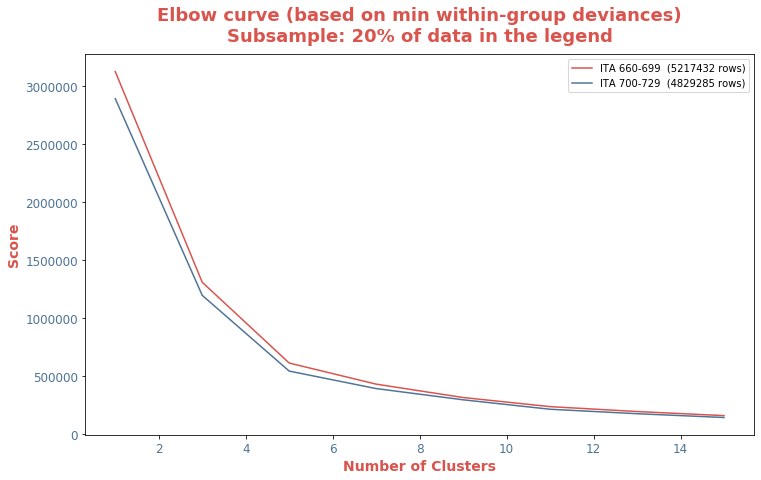

In [ ]:
title_ticks_ecc('Elbow curve (based on min within-group deviances)\nSubsample: 20% of data in the legend', 
                'Number of Clusters', 'Score', figsize= (12, 7))


for i, ita in enumerate(right_sign_losses):
    plt.plot(Nc, right_sign_losses[ita], label= ita + '  ({} rows)'.format(scaled_tu_dfs[ita].shape[0]),
                c= colors[i])


#plt.axhline(scores.describe().loc['min'] + scores.describe().loc['std']/2, c= 'red')
pl.legend()

#plt.savefig('/Users/federicofrancone/Desktop/elbow_curves.PNG', quality= 80)
pl.show()

In [ ]:
colors = ['xkcd:pale red', 'xkcd:cadet blue','xkcd:pale orange']

In [ ]:
for ita in ita_ranges:
    print("\nnumber of unique values for ita {} : \n{}".format(ita, scaled_tu_dfs[ita].nunique(), ))


number of unique values for ita ITA 700-729 : 
final_utilization    2059
TU_open_bankcards       9
acx_credit              8
dtype: int64


<b> Doing directly 3 clusters and see the trends/proportions

In [ ]:
clus_3_tu = diz_tu_dfs.copy()

for ita in scaled_tu_dfs.keys():
    print('Performing KMeans with 3 clusters and range {}'.format(ita))
    km= KMeans(n_clusters= 3, init='k-means++')
    km.fit(scaled_tu_dfs[ita])
    
    clus_3_tu[ita]['income']= diz_all_dfs[ita]['IBE8641_INCOME_50K'].values
    clus_3_tu[ita]['home']= diz_all_dfs[ita]['IBE8642_HOME_MARKET_VALUE_200K'].values
    
    clus_3_tu[ita]['Cluster']= km.labels_

Performing KMeans with 3 clusters and range ITA 660-699
Performing KMeans with 3 clusters and range ITA 700-729


In [ ]:
clus_3_tu[ita]

,ita_range,TU_utilization,TU_open_bankcards,acx_credit,income,home,Cluster
EMAIL_ADDRESS_MD5,,,,,,,
1ba79422be80232c95d0f2880d30650a,ITA 700-729,0.0,1.00,1000.0,0,0,6
86f1a51f5b7a6754e7f82f434bc684ee,ITA 700-729,0.0,2.69,300.0,0,1,2
5b3967833c982d47878ee60e5f852a9a,ITA 700-729,0.0,2.69,5000.0,1,1,2
5cc13e24767444304fe9dda035d71f2a,ITA 700-729,0.0,0.00,5000.0,1,1,0
5d61ef03dacc11af7e5b53a6ad1567d0,ITA 700-729,1.0,1.00,15000.0,1,1,10
...,...,...,...,...,...,...,...
69f0db409fab2b4967c94285e796ea78,ITA 700-729,0.0,2.00,15000.0,1,1,1
f05162a58498838cfcf5b22e7f974ffb,ITA 700-729,1.0,1.00,500.0,0,1,4
a6e819bcc250bd8da85e30540dc1df7d,ITA 700-729,0.0,2.69,3000.0,1,1,2


In [ ]:
clus_3_tu[ita][clus_3_tu[ita]['Cluster']==5]['TU_utilization'].unique()

array([0.])

In [ ]:
def get_final_means_new(row):
    
    d={}
    d['Total']= len(row)
    d['#Open Bankcards']= row['TU_open_bankcards'].mean()
    d['Credit Line']= row['acx_credit'].mean()
    d['Utilization']= row['TU_utilization'].mean()
    
    d['Income']= row['income'].mean()
    d['Home Market Value']= row['home'].mean()
    
    return pd.Series(d)

In [ ]:
# writer= pd.ExcelWriter('/Users/federicofrancone/Desktop/Segmentation_TU_only_KMeanns_15M.xlsx')

final_means= {}

i= 3
for ita in scaled_tu_dfs.keys():
    print(ita)
    final_means[ita]= clus_3_tu[ita].groupby('Cluster').apply(get_final_means_new)
    
#     final_means[ita].to_excel(writer, startrow= i, startcol= 2)
    
#     worksheet = writer.sheets['Sheet1']
#     worksheet.write(i-2, 0, ita)
    
    i+=7
    

writer.save()
writer.close()

final_means[ita_ranges[0]]

ITA 660-699
ITA 700-729


,Total,#Open Bankcards,Credit Line,Utilization,Income,Home Market Value
Cluster,,,,,,
0,3088812.0,1.384557,2391.997765,0.0,0.607106,0.439738
1,1393209.0,1.477253,12245.718338,0.0,0.640743,0.467780
2,735411.0,1.354021,4763.037812,1.0,0.612141,0.424832


## <center> <font color= 'red'> Semi Automated way: choosing intermediate number of clusters to get the final 3 ranges 

In [ ]:
## choosing 13 clusters to have more flexibility in doing 3
optimal_n_clusters= 13

clus_13_tu = diz_tu_dfs.copy()

for ita in scaled_tu_dfs.keys():
    print('Performing KMeans with {} clusters and range {}'.format(optimal_n_clusters, ita))
    km= KMeans(n_clusters= optimal_n_clusters, init='k-means++', random_state= 42)
    km.fit(scaled_tu_dfs[ita])
    
    clus_13_tu[ita]['income']= diz_all_dfs[ita]['IBE8641_INCOME_50K'].values
    clus_13_tu[ita]['home']= diz_all_dfs[ita]['IBE8642_HOME_MARKET_VALUE_200K'].values
    
    clus_13_tu[ita]['Cluster']= km.labels_

Performing KMeans with 13 clusters and range ITA 700-729


In [ ]:
clus_13_tu = {}
clus_13_tu['ITA 700-729']= pd.read_csv('full_dfs_and_assignments/700-730_original_13.csv')
clus_13_tu['ITA 700-729'].head()

,EMAIL_ADDRESS_MD5,ita_range,final_utilization,TU_open_bankcards,acx_credit,income,home,Cluster
0,d6d24d25c9a1988a0ad44d12d6b1354d,ITA 700-729,0.005915,4.0,3000,1,1,1
1,499fc219da1f6a2e76be2cbb110e37dd,ITA 700-729,0.009800,3.0,3000,1,1,3
2,fea0b1176ec33f7a1443af6bee37dc03,ITA 700-729,0.022867,4.0,3000,1,0,1
3,7ea9fa4a9342fa7e85c0a246f7f7223b,ITA 700-729,0.022867,6.0,3000,0,0,1
4,4896cb5b49c985a3bec4bc09ed402f31,ITA 700-729,0.022867,0.0,10000,0,1,0


In [ ]:
ita= 'ITA 700-729'
initial_clus= clus_13_tu[ita].groupby('Cluster').apply(get_final_means_new)
initial_clus

,Total,#Open Bankcards,Credit Line,Utilization,Income,Home Market Value
Cluster,,,,,,
0,418312.0,0.603842,10000.000000,0.021737,0.699934,0.570961
1,129063.0,4.502956,3306.707577,0.022902,0.702719,0.548004
2,920954.0,1.037546,2257.471817,0.020237,0.698768,0.608446
3,472233.0,2.376875,2313.465599,0.014465,0.760358,0.843490
4,178331.0,0.863110,2433.451279,0.047199,0.594529,0.009135
5,2371.0,1.672569,4663.095740,0.600019,0.757065,0.653311
6,303282.0,2.698037,15000.000000,0.021511,0.743335,0.605575
7,690991.0,0.000000,2260.904990,0.021250,0.673520,0.564873
8,661021.0,2.655885,2311.918532,0.026613,0.686887,0.390915


<b> From here Custom 'Clustering': I must replicate the proportions of the 1st group (1st 3 lines). The way I do is minimizing distances from those ideal proportions

<img src ='finserv_image.png'>

In [ ]:
#### Ideal Proportion first Range

prop_complete = {}

### Respect to Base group (group 1)

base_cards = 1.51
base_credit = 3.595
base_income = 25.5
base_home = 14.5
base_utilization= 9.4
base_samples= 7.2

prop_complete['n_cards']= [2.5/base_cards, 5.54/base_cards]
prop_complete['credit']=  [5.165/base_credit, 10.599/base_credit]
prop_complete['utilization']= [58.6/base_utilization, 23.7/base_utilization]
prop_complete['income']=  [25.9/base_income, 38/base_income]
prop_complete['home']=    [13.5/base_home, 25.1/base_home]
prop_complete['total']= [5.1/base_samples, 4.1/base_samples]

df_prop_complete= pd.DataFrame(prop_complete, index= ['ideal_prop_group_2', 'ideal_prop_group_3']).T
df_prop_complete

,ideal_prop_group_2,ideal_prop_group_3
n_cards,1.655629,3.668874
credit,1.436718,2.948261
utilization,6.234043,2.521277
income,1.015686,1.490196
home,0.931034,1.731034
total,0.708333,0.569444


In [ ]:
# initial_clus = pd.read_excel('clusters_13_to_3/clus_13_ita_700_730.xlsx')
# initial_clus

In [ ]:
clus= initial_clus.reset_index()
clus= clus[['#Open Bankcards', 'Credit Line', 'Utilization', 'Income', 'Home Market Value', 'Total' ]]

### Readapting it to ther old code
new_names= ['#_CARDS', 'IBE8836_CREDIT', 'RC_SOL_UTIL', 'IBE8641_INCOME_50K', 'IBE8642_HOME_M_V_200K', 'Count']
clus.columns= new_names

only_imp_clus_count= clus
clus.head()

,#_CARDS,IBE8836_CREDIT,RC_SOL_UTIL,IBE8641_INCOME_50K,IBE8642_HOME_M_V_200K,Count
0,0.603842,10000.000000,0.021737,0.699934,0.570961,418312.0
1,4.502956,3306.707577,0.022902,0.702719,0.548004,129063.0
2,1.037546,2257.471817,0.020237,0.698768,0.608446,920954.0
3,2.376875,2313.465599,0.014465,0.760358,0.843490,472233.0
4,0.863110,2433.451279,0.047199,0.594529,0.009135,178331.0


In [ ]:
#clus.to_pickle('/Users/federicofrancone/Desktop/clus_13.pk1')
#only_imp_clus_count= clus= pd.read_pickle('/Users/federicofrancone/Desktop/clus.pk1')
#clus

In [ ]:
only_counts= clus[['Count']]

cards_count= clus[['#_CARDS', 'Count']]
cards_count

,#_CARDS,Count
0,0.603842,418312.0
1,4.502956,129063.0
2,1.037546,920954.0
3,2.376875,472233.0
4,0.863110,178331.0
5,1.672569,2371.0
6,2.698037,303282.0
7,0.000000,690991.0
8,2.655885,661021.0
9,2.638624,318807.0


In [ ]:
only_counts.iloc[:3].sum()[0]  

1468329.0

In [ ]:
cols= final_cols=  ['#_CARDS', 'IBE8836_CREDIT', 'IBE8641_INCOME_50K', 'IBE8642_HOME_M_V_200K'] #'Count'

only_imp_clus= clus[final_cols]
only_imp_clus.head()

,#_CARDS,IBE8836_CREDIT,IBE8641_INCOME_50K,IBE8642_HOME_M_V_200K
0,0.603842,10000.000000,0.699934,0.570961
1,4.502956,3306.707577,0.702719,0.548004
2,1.037546,2257.471817,0.698768,0.608446
3,2.376875,2313.465599,0.760358,0.843490
4,0.863110,2433.451279,0.594529,0.009135


In [ ]:
sc= StandardScaler()

scaled = pd.DataFrame(sc.fit_transform(only_imp_clus), columns= final_cols)
print(sc.inverse_transform([-0.786006,-0.780815,-0.129094,-0.122359]))
scaled.head()

[8.53218324e-01 2.57184099e+03 6.73124237e-01 4.47617431e-01]


,#_CARDS,IBE8836_CREDIT,IBE8641_INCOME_50K,IBE8642_HOME_M_V_200K
0,-1.000691,0.842806,0.259687,0.391515
1,2.356011,-0.620190,0.300063,0.295869
2,-0.627320,-0.849529,0.242769,0.547684
3,0.525693,-0.837290,1.135896,1.526921
4,-0.777491,-0.811064,-1.268816,-1.949160


In [ ]:
only_imp_clus_count.head(3)

,#_CARDS,IBE8836_CREDIT,RC_SOL_UTIL,IBE8641_INCOME_50K,IBE8642_HOME_M_V_200K,Count
0,0.603842,10000.000000,0.021737,0.699934,0.570961,418312.0
1,4.502956,3306.707577,0.022902,0.702719,0.548004,129063.0
2,1.037546,2257.471817,0.020237,0.698768,0.608446,920954.0


### Fixing group 1

In [ ]:
from sklearn.model_selection import ParameterGrid
from itertools import combinations

total_combinations_1st = 0
min_groups= 2  # the group must have at least # rows
max_groups= len(clus) - min_groups*2  #len(clus) - 4  #at least 2 rows per group, so I have to leave 4 for two groups

all_combinations_1st_split =[]

for i in range (min_groups, max_groups +1):  #from 2 to 4
    comb= list(combinations(range(len(clus)), i))
    
    all_combinations_1st_split.append(comb)
    total_combinations_1st += len(comb)
    
total_combinations_1st

7800

In [ ]:
all_values= np.arange(0, len(clus))
all_values, all_combinations_1st_split[-1][-1]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 (4, 5, 6, 7, 8, 9, 10, 11, 12))

#### Calculating Total number of iterations

In [ ]:
total_iterations=0
total_combinations = total_combinations_1st

for list_comb in all_combinations_1st_split:
    for comb in list_comb:   ### all lists of combinations for group 1. example of comb: (0,1,2)
        
        split_1 = list(comb)
        split_2_3= list(set(all_values) - set(split_1))  
        all_combinations_2_3 =[]

        min_groups= 2  #never less than 2
        max_groups= len(split_2_3)- min_groups  #it is an upper bound
        
        clus_2_3= only_imp_clus.iloc[split_2_3]

        for i in range (min_groups, max_groups+1):  #split_2_3 is for both, I have to take off at least 2 for the 3rd
            comb= list(combinations(range(len(clus_2_3)), i))

            all_combinations_2_3.append(comb)
            total_combinations += len(comb)

        #print('checkpoint 1.0 ok, \t len(all_combinations_2_3) = ', len(all_combinations_2_3))

        ############### Initialiting lists  #################

        not_managed = []

        ############### Splits group 2 and 3 #################

        
        all_values_2_3 = np.arange( len(all_values) -  len(split_1)  )
  
        
        for set_splits in all_combinations_2_3:
            for split in set_splits:
                total_iterations+=1 
                
                if total_iterations%100000 == 0:
                    print('Iteration {}'.format(total_iterations))

Iteration 100000
Iteration 200000
Iteration 300000
Iteration 400000
Iteration 500000
Iteration 600000
Iteration 700000
Iteration 800000
Iteration 900000
Iteration 1000000
Iteration 1100000
Iteration 1200000
Iteration 1300000
Iteration 1400000


In [ ]:
total_combinations, total_iterations, total_iterations+total_combinations_1st

(1418352, 1410552, 1418352)

In [ ]:
cols, final_cols

(['#_CARDS', 'IBE8836_CREDIT', 'IBE8641_INCOME_50K', 'IBE8642_HOME_M_V_200K'],
 ['#_CARDS', 'IBE8836_CREDIT', 'IBE8641_INCOME_50K', 'IBE8642_HOME_M_V_200K'])

In [ ]:
cols_with_rc= list(clus.drop(['Count'], axis=1, errors='ignore').columns)
cols_with_rc

['#_CARDS',
 'IBE8836_CREDIT',
 'RC_SOL_UTIL',
 'IBE8641_INCOME_50K',
 'IBE8642_HOME_M_V_200K']

In [ ]:
cols_with_count= cols_with_rc+ ['Count']
cols_with_count

['#_CARDS',
 'IBE8836_CREDIT',
 'RC_SOL_UTIL',
 'IBE8641_INCOME_50K',
 'IBE8642_HOME_M_V_200K',
 'Count']

In [ ]:
final_cols_to_display= ['n_cards', 'credit', 'utilization', 'income', 'home', 'Total']
final_cols_to_display

['n_cards', 'credit', 'utilization', 'income', 'home', 'Total']

In [ ]:
def get_final_df_proportions(df_proportions, best_group1_split, best_group2_split, best_group3_split, cols= cols):
    temp_g1= only_imp_clus_count.iloc[best_group1_split]
    temp_g2= only_imp_clus_count.iloc[best_group2_split]
    temp_g3= only_imp_clus_count.iloc[best_group3_split]
    
    means_group1= {}
    for col in cols:
        means_group1[col]= np.average(temp_g1[col], weights= temp_g1['Count'])

    means_group1 = pd.Series(means_group1)
    
    
    means_group2= {}
    for col in cols:
        means_group2[col]= np.average(temp_g2[col], weights= temp_g2['Count'])

    means_group2 = pd.Series(means_group2)
    
    prop_means_2_1= ratio_2_1 = means_group2 / means_group1

    means_group3= {}
    for col in cols:
        means_group3[col]= np.average(temp_g3[col], weights= temp_g3['Count'])

    means_group3 = pd.Series(means_group3)
    prop_means_3_1= ratio_3_1 = means_group3/ means_group1

    df_proportions['current_prop_group2'] = prop_means_2_1.values
    df_proportions['current_prop_group3'] = prop_means_3_1.values 
    
    final_cols = ['ideal_prop_group_2','current_prop_group2', 'ideal_prop_group_3','current_prop_group3']
    
    return round(df_proportions,2)[final_cols]

In [ ]:
def get_final_means (best_group1_split, best_group2_split, best_group3_split, pass_df_index= False,
                       cols= cols_with_count, final_col_names= final_cols_to_display):
    temp_g1= only_imp_clus_count.iloc[best_group1_split]
    temp_g2= only_imp_clus_count.iloc[best_group2_split]
    temp_g3= only_imp_clus_count.iloc[best_group3_split]
    
    means_group1= {}
    for col in cols:
        means_group1[col]= np.average(temp_g1[col], weights= temp_g1['Count'])

    means_group1 = pd.Series(means_group1)
    
    means_2= {}
    for col in cols:
        means_2[col]= np.average(temp_g2[col], weights= temp_g2['Count'])

    means_2 = pd.Series(means_2)
    

    means_3= {}
    for col in cols:
        means_3[col]= np.average(temp_g3[col], weights= temp_g3['Count'])

    means_3 = pd.Series(means_3)
    
    df= pd.DataFrame(means_group1)
    if pass_df_index:
        df.index= final_col_names
    df['2']= list(means_2)
    df['3']= list(means_3)
    
    #df.columns= index= ["Neophytes", "Mercurials", "Pragmatics"]
    df_means= df.T
    df_means= round(df_means, 6)
    
    total = [temp_g1['Count'].sum(), temp_g2['Count'].sum(), temp_g3['Count'].sum()]
    df_means['Total']= total
    
    return df_means

#### Choosing best results only according to Total

In [ ]:
power= 4

total_combinations = total_combinations_1st
iteration= 0

final_splits_1= []
final_splits_2= []
final_splits_3= []

final_scores_badness= []


for list_comb in all_combinations_1st_split:
    for comb in list_comb:   ### all lists of combinations for group 1

        #print('current split of group 1 is: ', comb, '\n')

        split_1 = list(comb)
        split_2_3= list(set(all_values) - set(split_1))  
        clus_1_count= only_counts.iloc[split_1]
        clus_2_3_count= only_counts.iloc[split_2_3]

        #print('\nlen(clus_1_count)', len(clus_1_count))
        #print('len(clus_2_3_count)', len(clus_2_3_count))
        ##print('checkpoint 0 ok')
        #### Means group 1 ######
        sum1= clus_1_count.sum()[0]


        ##print('checkpoint 0.1 ok \n means group 1 are: ', means_group1)

        ############### All combinations for splits group 2 and 3 #################

        all_combinations_2_3 =[]

        min_groups= 2  #never less than 2
        max_groups= len(split_2_3) - min_groups  #split_2_3 is for both, I have to take off at least 2 for the 3rd
        
        total_combinations_2_3 = 0
        for i in range (min_groups, max_groups+1 ):  #+1 bcs python stops before
            comb= list(combinations(range(len(clus_2_3_count)), i))

            all_combinations_2_3.append(comb)
            total_combinations += len(comb)
            total_combinations_2_3 += 1

        ##print('checkpoint 1.0 ok, \t len(all_combinations_2_3) = ', len(all_combinations_2_3))

        ############### Initialiting lists  #################

        not_managed = []

        ############### Splits group 2 and 3 #################

        
        all_values_2_3 = np.arange( len(all_values) -  len(split_1)  )
        #print('Real len(all_values):', len(all_values_2_3))
        
        for set_splits in all_combinations_2_3:
            for split in set_splits:
                
                #print('\nRemember that current split of group 1 is: ', split_1)
                #print('split_2_3 is: \n', split)

                if iteration%10000 == 0:
                    print('Iteration {}/{}'.format(iteration, total_iterations ))

                iteration += 1
                #print('\n\niteration n=', iteration)

                try:

                    group_2_sample= list(split)
                    group_3_sample= list(set(all_values_2_3) - set(group_2_sample))
                    
                    
                    #print('\nset(group_2_sample)', set(group_2_sample))
                    #print('\nset(group_3_sample)', set(group_3_sample))
                    #print('len(group_2_sample) and len(group_3_sample)', len(group_2_sample) , len(group_3_sample))
                    
                
                    temp_g2= clus_2_3_count.iloc[group_2_sample]
                    temp_g3= clus_2_3_count.iloc[group_3_sample]
                    
                    #### Appending splits to create final dataframe;
                    #### if I used loc rather than iloc it was less confusing...
                    final_splits_1.append(split_1)
                    real_split_2= list(temp_g2.index)
                    real_split_3= list(temp_g3.index)
                    
                    final_splits_2.append(real_split_2)
                    final_splits_3.append(real_split_3)

                    #print('checkpoint 1.1 ok')


                    sum2= temp_g2.sum()[0]
                    ratio_2_1 = sum2 / sum1

                    #print('checkpoint 1.2 ok')

                    sum3= temp_g3.sum()[0]
                    ratio_3_1 = sum3 / sum1
                    
                    ##print('means_group3', means_group3)
                    
                    #print('checkpoint 1.3 ok')

                    squared_diff_2_1 = (1+ abs(ratio_2_1 - df_prop_complete['ideal_prop_group_2'].loc['total']) ) **power
                    

                    squared_diff_3_1 = (1+ abs(ratio_3_1 - df_prop_complete['ideal_prop_group_3'].loc['total'])  ) **power
                    
                    total_badness= squared_diff_2_1+ squared_diff_3_1
                    #print('total_badness = ', total_badness)
                    final_scores_badness.append(total_badness)
                    #print('checkpoint 1.6 ok')

                except:
                    print('Failed')
                    not_managed.append((group_2_sample, group_3_sample))
                    break

Iteration 0/1410552
Iteration 10000/1410552
Iteration 20000/1410552
Iteration 30000/1410552
Iteration 40000/1410552
Iteration 50000/1410552
Iteration 60000/1410552
Iteration 70000/1410552
Iteration 80000/1410552
Iteration 90000/1410552
Iteration 100000/1410552
Iteration 110000/1410552
Iteration 120000/1410552
Iteration 130000/1410552
Iteration 140000/1410552
Iteration 150000/1410552
Iteration 160000/1410552
Iteration 170000/1410552
Iteration 180000/1410552
Iteration 190000/1410552
Iteration 200000/1410552
Iteration 210000/1410552
Iteration 220000/1410552
Iteration 230000/1410552
Iteration 240000/1410552
Iteration 250000/1410552
Iteration 260000/1410552
Iteration 270000/1410552
Iteration 280000/1410552
Iteration 290000/1410552
Iteration 300000/1410552
Iteration 310000/1410552
Iteration 320000/1410552
Iteration 330000/1410552
Iteration 340000/1410552
Iteration 350000/1410552
Iteration 360000/1410552
Iteration 370000/1410552
Iteration 380000/1410552
Iteration 390000/1410552
Iteration 4000

In [ ]:
#(0.7-0.93)**2 + (0.6- 0.44)**2

final_df_count = pd.DataFrame(list(zip(final_splits_1, final_splits_2, final_splits_3, final_scores_badness)))
final_df_count.columns= ['group1','group2', 'group3', 'total_badness_count']

final_df_count= final_df_count.sort_values(by= 'total_badness_count', ascending= True)

print(len(final_df_count))
final_df_count.head()                    

1410552


,group1,group2,group3,total_badness_count
1268323,"[2, 5, 8, 9, 10, 11]","[0, 6, 7]","[1, 3, 4, 12]",2.002427
677069,"[2, 6, 7, 10]","[0, 1, 4, 9, 11, 12]","[3, 5, 8]",2.004767
676979,"[2, 6, 7, 10]","[0, 5, 8, 9, 11]","[12, 1, 3, 4]",2.004769
1350694,"[1, 2, 4, 9, 10, 11, 12]","[0, 6, 7]","[3, 5, 8]",2.005134
835644,"[0, 2, 3, 4, 5]","[8, 9, 10, 12]","[1, 6, 7, 11]",2.005368


## First Selection: Filtering only first N best according to Total

In [ ]:
first_selection_count= 100000

selected_1st= final_df_count.iloc[:first_selection_count]
selected_1st.head(2)

,group1,group2,group3,total_badness_count
1268323,"[2, 5, 8, 9, 10, 11]","[0, 6, 7]","[1, 3, 4, 12]",2.002427
677069,"[2, 6, 7, 10]","[0, 1, 4, 9, 11, 12]","[3, 5, 8]",2.004767


##### <font color= 'green'> Checking how many satisfy the constraint

In [ ]:
temp_df= selected_1st.copy()   #selected_2nd.copy()

respecting_trends_indexes = []
failed= 0

name_utilization= ['utilization']   #'rc_proxy'

for i in range(len(temp_df)):
    
    if i%1000 == 0:
        print('\nIteration {}/{}'.format(i, len(temp_df)))
    
    best_group1_split = temp_df.iloc[i]['group1']
    best_group2_split = temp_df.iloc[i]['group2']
    best_group3_split = temp_df.iloc[i]['group3']
    
    #assert(len(best_group1_split)>0 and len(best_group2_split)>0 and len(best_group3_split)>0)
    
    if len(best_group1_split)==0 or len(best_group2_split)==0 or len(best_group3_split)==0:
        print('Skipping iteration because there is an empty group. Iteration n.', i)
        print(best_group1_split, best_group2_split, best_group3_split)
        failed+=1
        continue # go to next iteration
    
    
    final_means= get_final_means (best_group1_split, best_group2_split, best_group3_split, pass_df_index=True)
    
    final_means.index= ['best_mean_group1', 'best_mean_group2', 'best_mean_group3']
    
    means_1, means_2, means_3=  final_means.iloc[0], final_means.iloc[1], final_means.iloc[2]
    
    
    if ( ### constraints between group 2 and 1, all increasing except Total
           means_1.loc['Total'] >  means_2.loc['Total'] and
           means_1.loc['n_cards'] <  means_2.loc['n_cards'] and 
           means_1.loc['credit'] < means_2.loc['credit'] and
           means_1.loc['income'] < means_2.loc['income'] and
           means_1.loc['home'] > means_2.loc['home'] and
            means_1.loc['utilization'] < means_2.loc['utilization'] and  #ascending
        
        ### constraints between group 3 and 2 , all increasing except utilization
        means_2.loc['Total'] >  means_3.loc['Total'] and
        means_2.loc['n_cards'] <  means_3.loc['n_cards'] and
        means_2.loc['credit'] < means_3.loc['credit'] and
        means_2.loc['income'] < means_3.loc['income'] and
        means_2.loc['home'] < means_3.loc['home'] and
         means_2.loc['utilization'] > means_3.loc['utilization'] ):   #descending
            
            respecting_trends_indexes.append(i)


Iteration 0/100000

Iteration 1000/100000

Iteration 2000/100000

Iteration 3000/100000

Iteration 4000/100000

Iteration 5000/100000

Iteration 6000/100000

Iteration 7000/100000

Iteration 8000/100000

Iteration 9000/100000

Iteration 10000/100000

Iteration 11000/100000

Iteration 12000/100000

Iteration 13000/100000

Iteration 14000/100000

Iteration 15000/100000

Iteration 16000/100000

Iteration 17000/100000

Iteration 18000/100000

Iteration 19000/100000

Iteration 20000/100000

Iteration 21000/100000

Iteration 22000/100000

Iteration 23000/100000

Iteration 24000/100000

Iteration 25000/100000

Iteration 26000/100000

Iteration 27000/100000

Iteration 28000/100000

Iteration 29000/100000

Iteration 30000/100000

Iteration 31000/100000

Iteration 32000/100000

Iteration 33000/100000

Iteration 34000/100000

Iteration 35000/100000

Iteration 36000/100000

Iteration 37000/100000

Iteration 38000/100000

Iteration 39000/100000

Iteration 40000/100000

Iteration 41000/100000

Iter

<b> Taking already a filter of the one satisfying the constraints

In [ ]:
print('Number combinations respecting trend constraints: ', temp_df.iloc[respecting_trends_indexes].shape[0])
#final_df.iloc[respecting_trends_indexes].head()

results_respecting_trends= temp_df.iloc[respecting_trends_indexes]
results_respecting_trends.index= np.arange(len(respecting_trends_indexes))

results_respecting_trends.head()

Number combinations respecting trend constraints:  310


,group1,group2,group3,total_badness_count
0,"[1, 2, 4, 7, 10]","[0, 8, 11, 12]","[3, 5, 6, 9]",2.151095
1,"[1, 2, 4, 7, 10]","[0, 5, 8, 11, 12]","[3, 6, 9]",2.161147
2,"[1, 2, 4, 7, 11]","[0, 5, 8, 12]","[3, 6, 9, 10]",2.305938
3,"[1, 2, 4, 7, 11]","[0, 8, 10, 12]","[3, 5, 6, 9]",2.338748
4,"[1, 2, 4, 5, 7, 11]","[0, 8, 10, 12]","[3, 6, 9]",2.341748


### Minimizing in respect to number of cards: starting from the dataset filtered

In [ ]:
cards_count.head(3)

,#_CARDS,Count
0,0.603842,418312
1,4.502956,129063
2,1.037546,920954


In [ ]:
df_prop_complete

,ideal_prop_group_2,ideal_prop_group_3
n_cards,1.655629,3.668874
credit,1.436718,2.948261
utilization,6.234043,2.521277
income,1.015686,1.490196
home,0.931034,1.731034
total,0.708333,0.569444


In [ ]:
df= results_respecting_trends.copy()
power= 2
final_scores_badness= []

for i in range(len(df)):
    
    if i%500 == 0:
        print('\nIteration {}/{}'.format(i, len(df)))
    
    best_group1_split = df.iloc[i]['group1']
    best_group2_split = df.iloc[i]['group2']
    best_group3_split = df.iloc[i]['group3']
    
    clus_1_count= cards_count.iloc[best_group1_split]
    clus_2_count= cards_count.iloc[best_group2_split]
    clus_3_count= cards_count.iloc[best_group3_split]
    
    means_1= np.average(clus_1_count['#_CARDS'], weights= clus_1_count['Count'])
    means_2= np.average(clus_2_count['#_CARDS'], weights= clus_2_count['Count'])
    means_3= np.average(clus_3_count['#_CARDS'], weights= clus_3_count['Count'])
    
    #print(means_1, means_2, means_3)
    
    ratio_2_1 = means_2 / means_1
    ratio_3_1 = means_3 / means_1
    
    #print(ratio_2_1, ratio_3_1)
    
    squared_diff_2_1 = (ratio_2_1 - df_prop_complete['ideal_prop_group_2'].loc['n_cards']) **power
    squared_diff_3_1 = (ratio_3_1 - df_prop_complete['ideal_prop_group_3'].loc['n_cards']) **power

    total_badness= squared_diff_2_1+ squared_diff_3_1
    #print('total_badness = ', total_badness)
    final_scores_badness.append(total_badness)
    
df['total_badness_cards']= final_scores_badness
df.head()    


Iteration 0/310


,group1,group2,group3,total_badness_count,total_badness_cards
0,"[1, 2, 4, 7, 10]","[0, 8, 11, 12]","[3, 5, 6, 9]",2.151095,0.805804
1,"[1, 2, 4, 7, 10]","[0, 5, 8, 11, 12]","[3, 6, 9]",2.161147,0.802143
2,"[1, 2, 4, 7, 11]","[0, 5, 8, 12]","[3, 6, 9, 10]",2.305938,0.733218
3,"[1, 2, 4, 7, 11]","[0, 8, 10, 12]","[3, 5, 6, 9]",2.338748,0.649006
4,"[1, 2, 4, 5, 7, 11]","[0, 8, 10, 12]","[3, 6, 9]",2.341748,0.650202


In [ ]:
## Normalizing the two
sc= StandardScaler()
t= pd.DataFrame(sc.fit_transform(df[['total_badness_count','total_badness_cards']]), index= df.index)
df['Badness_count_cards']= (t**2).sum(axis=1)  #.values

df.sort_values(by= 'Badness_count_cards', ascending= True, inplace=True)
df.head()

,group1,group2,group3,total_badness_count,total_badness_cards,Badness_count_cards
105,"[2, 4, 5, 7, 11]","[0, 8, 9, 10]","[1, 3, 6, 12]",3.133848,2.520164,0.004860
110,"[2, 4, 5, 7, 11]","[0, 6, 8, 10]","[1, 3, 9, 12]",3.137496,2.555280,0.009348
111,"[2, 4, 7, 10, 12]","[0, 1, 5, 8, 11]","[3, 6, 9]",3.144027,2.576999,0.016357
112,"[2, 4, 7, 10, 12]","[0, 1, 8, 11]","[3, 5, 6, 9]",3.145337,2.580229,0.017830
118,"[2, 4, 7, 11]","[0, 5, 8, 9, 10]","[12, 1, 3, 6]",3.152208,2.536553,0.018978


In [ ]:
df['Badness_count_cards'].describe()

count    310.000000
mean       2.000000
std        2.316768
min        0.004860
25%        0.653647
50%        1.553344
75%        2.462150
max       14.739726
Name: Badness_count_cards, dtype: float64

In [ ]:
## I already did the filtering!!!

sec_selection_count= len(df)   #len(df)//2

selected_2nd = df.iloc[:sec_selection_count]
print(selected_2nd.shape)
selected_2nd.head(2)

(310, 6)


,group1,group2,group3,total_badness_count,total_badness_cards,Badness_count_cards
105,"[2, 4, 5, 7, 11]","[0, 8, 9, 10]","[1, 3, 6, 12]",3.133848,2.520164,0.004860
110,"[2, 4, 5, 7, 11]","[0, 6, 8, 10]","[1, 3, 9, 12]",3.137496,2.555280,0.009348


#### Only Trend Constraints for the other columns

In [ ]:
temp_df = selected_2nd.copy()   #selected_2nd.copy()

respecting_trends_indexes = []
failed= 0

name_utilization= ['utilization']   #'rc_proxy'

for i in range(len(temp_df)):
    
    if i%50 == 0:
        print('\nIteration {}/{}'.format(i, len(temp_df)))
    
    best_group1_split = temp_df.iloc[i]['group1']
    best_group2_split = temp_df.iloc[i]['group2']
    best_group3_split = temp_df.iloc[i]['group3']
    
    #assert(len(best_group1_split)>0 and len(best_group2_split)>0 and len(best_group3_split)>0)
    
    if len(best_group1_split)==0 or len(best_group2_split)==0 or len(best_group3_split)==0:
        print('Skipping iteration because there is an empty group. Iteration n.', i)
        print(best_group1_split, best_group2_split, best_group3_split)
        failed+=1
        continue # go to next iteration
    
    
    final_means= get_final_means (best_group1_split, best_group2_split, best_group3_split, pass_df_index=True)
    
    final_means.index= ['best_mean_group1', 'best_mean_group2', 'best_mean_group3']
    
    means_1, means_2, means_3=  final_means.iloc[0], final_means.iloc[1], final_means.iloc[2]
    
    
    if ( ### constraints between group 2 and 1, all increasing except Total
           means_1.loc['Total'] >  means_2.loc['Total'] and
           means_1.loc['n_cards'] <  means_2.loc['n_cards'] and 
           means_1.loc['credit'] < means_2.loc['credit'] and
           means_1.loc['income'] < means_2.loc['income'] and
           means_1.loc['home'] < means_2.loc['home'] and
           means_1.loc['utilization'] < means_2.loc['utilization'] and  #ascending
        
        ### constraints between group 3 and 2 , all increasing except utilization
        means_2.loc['Total'] >  means_3.loc['Total'] and
        means_2.loc['n_cards'] <  means_3.loc['n_cards'] and
        means_2.loc['credit'] < means_3.loc['credit'] and
        means_2.loc['income'] < means_3.loc['income'] and
        means_2.loc['home'] < means_3.loc['home'] and
        means_2.loc['utilization'] > means_3.loc['utilization'] ):   #descending
            
            respecting_trends_indexes.append(i)


Iteration 0/65

Iteration 50/65


In [ ]:
print('Number combinations respecting trend constraints: ', selected_2nd.iloc[respecting_trends_indexes].shape[0])
#final_df.iloc[respecting_trends_indexes].head()

results_respecting_trends= selected_2nd.iloc[respecting_trends_indexes]
results_respecting_trends.index= np.arange(len(results_respecting_trends))

results_respecting_trends.head()

Number combinations respecting trend constraints:  65


,group1,group2,group3,total_badness_count,total_badness_cards,Badness_count_cards
0,"[0, 5, 10, 11]","[1, 3, 4, 7, 8, 12]","[2, 6, 9]",3.205847,5.610049,0.080319
1,"[0, 10, 11]","[1, 3, 4, 7, 8, 12]","[9, 2, 5, 6]",3.206296,5.606646,0.080901
2,"[0, 10, 11]","[1, 3, 4, 5, 7, 8, 12]","[9, 2, 6]",3.219001,5.599952,0.086991
3,"[0, 2, 5, 11]","[1, 3, 4, 7, 8, 12]","[6, 9, 10]",3.217550,5.321240,0.125738
4,"[0, 2, 11]","[1, 3, 4, 7, 8, 12]","[10, 5, 6, 9]",3.218853,5.317133,0.126995


### Solution from optimization Count + Total + respecting only trend constraints

In [ ]:
#### WITHOUT CONSTRAINTS
split1, split2, split3 = [3, 5, 6, 11], [0, 2, 7, 9, 10, 12], [1, 4, 8]

df_prop_complete= get_final_df_proportions(df_prop_complete , split1, split2, split3, cols= cols_with_count)
df_prop_complete

,ideal_prop_group_2,current_prop_group2,ideal_prop_group_3,current_prop_group3
n_cards,1.66,0.35,3.67,1.04
credit,1.44,0.83,2.95,0.34
utilization,6.23,1.03,2.52,1.36
income,1.02,0.92,1.49,0.90
home,0.93,0.77,1.73,0.46
total,0.71,1.56,0.57,1.26


In [ ]:
get_final_means(split1, split2, split3, pass_df_index=True)  #round(x, 2)

,n_cards,credit,utilization,income,home,Total
0,2.484184,7231.299188,0.022014,0.750815,0.741415,398683.799506
2,0.863171,6022.367931,0.022735,0.693707,0.571047,623569.868831
3,2.571914,2466.876391,0.029909,0.671989,0.341547,501239.619348


# Doing all iterations minimizing all together

In [ ]:
clus

,#_CARDS,IBE8836_CREDIT,RC_SOL_UTIL,IBE8641_INCOME_50K,IBE8642_HOME_M_V_200K,Count
0,0.603842,10000.000000,0.021737,0.699934,0.570961,418312
1,4.502956,3306.707577,0.022902,0.702719,0.548004,129063
2,1.037546,2257.471817,0.020237,0.698768,0.608446,920954
3,2.376875,2313.465599,0.014465,0.760358,0.843490,472233
4,0.863110,2433.451279,0.047199,0.594529,0.009135,178331
5,1.672569,4663.095740,0.600019,0.757065,0.653311,2371
6,2.698037,15000.000000,0.021511,0.743335,0.605575,303282
7,0.000000,2260.904990,0.021250,0.673520,0.564873,690991
8,2.655885,2311.918532,0.026613,0.686887,0.390915,661021
9,2.638624,10000.000000,0.021615,0.724523,0.583268,318807


In [ ]:
df_prop_complete.index

Index(['n_cards', 'credit', 'utilization', 'income', 'home', 'total'], dtype='object')

In [ ]:
cols_to_optimize= ['#_CARDS', 'IBE8836_CREDIT', 'RC_SOL_UTIL', 'Count']
good_names = ['n_cards', 'credit', 'utilization', 'total']

sc= StandardScaler()

scaled = pd.DataFrame(sc.fit_transform(clus[cols_to_optimize]), columns= cols_to_optimize)
print(sc.inverse_transform([1.141308, 0.160128,-0.771805,-0.009183]))
scaled.head()

[ 3.09196824e+00  6.87670994e+03 -3.39886485e-02  3.46784894e+05]


,#_CARDS,IBE8836_CREDIT,RC_SOL_UTIL,Count
0,-1.000691,0.842806,-0.415770,0.255518
1,2.356011,-0.620190,-0.408326,-0.814909
2,-0.627320,-0.849529,-0.425353,2.115652
3,0.525692,-0.837290,-0.462231,0.455064
4,-0.777490,-0.811064,-0.253091,-0.632582


In [ ]:
df= selected_2nd.copy()
power= 2
final_scores_badness= []


for i in range(len(df)):  
    
    if i%500 == 0:
        print('\nIteration {}/{}'.format(i, len(df)))
    
    best_group1_split = df.iloc[i]['group1']
    best_group2_split = df.iloc[i]['group2']
    best_group3_split = df.iloc[i]['group3']
    
    clus_1_count= clus.iloc[best_group1_split]
    clus_2_count= clus.iloc[best_group2_split]
    clus_3_count= clus.iloc[best_group3_split]
    
    means_group1= {}
    for col in cols_to_optimize:
        means_group1[col]= np.average(clus_1_count[col], weights= clus_1_count['Count'])

    means_group1 = pd.Series(means_group1)
    
    means_group2= {}
    for col in cols_to_optimize:
        means_group2[col]= np.average(clus_2_count[col], weights= clus_2_count['Count'])

    means_group2 = pd.Series(means_group2)
    
    means_group3= {}
    for col in cols_to_optimize:
        means_group1[col]= np.average(clus_3_count[col], weights= clus_3_count['Count'])

    means_group3 = pd.Series(means_group3)
    
    ratio_2_1 = means_group2 / means_group1
    ratio_3_1 = means_group3/ means_group1
    
    
    squared_diff_2_1 = (1+ abs(ratio_2_1 - df_prop_complete['ideal_prop_group_2'].loc[good_names].values)) **power
                    
    #print('checkpoint 1.3.1 ok')
    scaled_sq_diff_2_1= sc.transform(pd.DataFrame(squared_diff_2_1).T)

    #print('checkpoint 1.3.2 ok')

    #sum_squared_diff_2_1 = squared_diff_2_1.sum()
    sum_squared_diff_2_1 = abs(pd.DataFrame(scaled_sq_diff_2_1).T).sum()[0]
    # appending result
    #sum_squared_2_1.append(sum_squared_diff_2_1)
    #print('checkpoint 1.4 ok')

    ### Now I do the same for group 3 with group 1...

    squared_diff_3_1 = (1+ abs(ratio_3_1 - df_prop_complete['ideal_prop_group_3'].loc[good_names].values)) **power
    scaled_sq_diff_3_1= sc.transform(pd.DataFrame(squared_diff_3_1).T)

    #sum_squared_diff_2_1 = squared_diff_2_1.sum()
    sum_squared_diff_3_1 = abs(pd.DataFrame(scaled_sq_diff_3_1).T).sum()[0]
    # appending result
    #sum_squared_3_1.append(sum_squared_diff_3_1)
    #print('checkpoint 1.5 ok')

    total_badness= sum_squared_diff_2_1+ sum_squared_diff_3_1
    #print('total_badness = ', total_badness)
    final_scores_badness.append(total_badness)


Iteration 0/310


<b> Choosing Best Result

In [ ]:
df['total_badness_all_together']= final_scores_badness
df.sort_values('total_badness_all_together', inplace=True)

final_df= df.copy()
final_df.head()    

,group1,group2,group3,total_badness_count,total_badness_cards,Badness_count_cards,total_badness_all_together
157,"[0, 2, 4, 7]","[1, 5, 8, 9, 10, 11, 12]","[3, 6]",3.217746,4.336145,3.188806,198.951109
255,"[0, 1, 2, 7, 10]","[4, 5, 8, 9, 11, 12]","[3, 6]",3.338096,0.960025,2.780301,199.244158
134,"[0, 2, 4, 7]","[5, 8, 10, 11, 12]","[1, 3, 6, 9]",3.181982,2.755031,0.117704,199.812672
87,"[0, 2, 4, 7]","[1, 5, 8, 10, 11, 12]","[3, 6, 9]",3.067160,3.803999,1.571906,199.946606
248,"[2, 4, 7, 12]","[0, 1, 5, 8, 9, 10, 11]","[3, 6]",3.328143,3.938180,2.464947,200.162343


In [ ]:
#### checking max lens (max n of groups)   CHECK OK, each is between 2 and 4 groups
for group in ['group1', 'group2', 'group3']:
    print(final_df[group].apply(lambda x: len(x)).min())
    print(final_df[group].apply(lambda x: len(x)).max())

3
7
2
7
2
6


<b> Checking that the difference in average is similar to the desired proportion

In [ ]:
final_df.head()

,group1,group2,group3,total_badness_count,total_badness_cards,Badness_count_cards,total_badness_all_together
157,"[0, 2, 4, 7]","[1, 5, 8, 9, 10, 11, 12]","[3, 6]",3.217746,4.336145,3.188806,198.951109
255,"[0, 1, 2, 7, 10]","[4, 5, 8, 9, 11, 12]","[3, 6]",3.338096,0.960025,2.780301,199.244158
134,"[0, 2, 4, 7]","[5, 8, 10, 11, 12]","[1, 3, 6, 9]",3.181982,2.755031,0.117704,199.812672
87,"[0, 2, 4, 7]","[1, 5, 8, 10, 11, 12]","[3, 6, 9]",3.067160,3.803999,1.571906,199.946606
248,"[2, 4, 7, 12]","[0, 1, 5, 8, 9, 10, 11]","[3, 6]",3.328143,3.938180,2.464947,200.162343


In [ ]:
#### WITHOUT CONSTRAINTS
split1, split2, split3 = [0, 1, 2], [4, 5, 6, 7, 10, 11, 12], [3, 8, 9]

df_prop_complete= get_final_df_proportions(df_prop_complete , split1, split2, split3, cols= cols_with_count)
df_prop_complete

,ideal_prop_group_2,current_prop_group2,ideal_prop_group_3,current_prop_group3
n_cards,1.66,0.68,3.67,2.10
credit,1.44,1.67,2.95,0.88
utilization,6.23,1.41,2.52,1.03
income,1.02,0.97,1.49,1.03
home,0.93,0.83,1.73,0.98
total,0.71,0.64,0.57,0.74


In [ ]:
get_final_means(split1, split2, split3, pass_df_index=True )

,n_cards,credit,utilization,income,home,Total
0,1.218590,4555.464954,0.020899,0.699447,0.592454,1468329
2,0.831317,7628.706440,0.029384,0.680677,0.489264,1620072
3,2.561357,4000.377050,0.021565,0.719044,0.580332,1452061


### ADDING TREND CONTRAINTS: Iterating through the results and filtering those respecting the trends

In [ ]:
respecting_trends_indexes_final = []
failed= 0

name_utilization= ['utilization']   #'rc_proxy'

for i in range(len(final_df)):
    
    if i%500 == 0:
        print('\nIteration {}/{}'.format(i, len(final_df)))
    
    best_group1_split = final_df.iloc[i]['group1']
    best_group2_split = final_df.iloc[i]['group2']
    best_group3_split = final_df.iloc[i]['group3']
    
    #assert(len(best_group1_split)>0 and len(best_group2_split)>0 and len(best_group3_split)>0)
    
    if len(best_group1_split)==0 or len(best_group2_split)==0 or len(best_group3_split)==0:
        print('Skipping iteration because there is an empty group. Iteration n.', i)
        print(best_group1_split, best_group2_split, best_group3_split)
        failed+=1
        continue # go to next iteration
    
    
    final_means= get_final_means (best_group1_split, best_group2_split, best_group3_split, pass_df_index=True)
    
    final_means.index= ['best_mean_group1', 'best_mean_group2', 'best_mean_group3']
    
    means_1, means_2, means_3=  final_means.iloc[0], final_means.iloc[1], final_means.iloc[2]
    
    
    if ( ### constraints between group 2 and 1, all increasing except Total
           means_1.loc['Total'] >  means_2.loc['Total'] and
           means_1.loc['n_cards'] <  means_2.loc['n_cards'] and 
           means_1.loc['credit'] < means_2.loc['credit'] and
           means_1.loc['income'] < means_2.loc['income'] and
           means_1.loc['home'] > means_2.loc['home'] and
            means_1.loc['utilization'] < means_2.loc['utilization'] and  #ascending
        
        ### constraints between group 3 and 2 , all increasing except utilization
        means_2.loc['Total'] >  means_3.loc['Total'] and
        means_2.loc['n_cards'] <  means_3.loc['n_cards'] and
        means_2.loc['credit'] < means_3.loc['credit'] and
        means_2.loc['income'] < means_3.loc['income'] and
        means_2.loc['home'] < means_3.loc['home'] and
         means_2.loc['utilization'] > means_3.loc['utilization'] 
    
        and means_3.loc['utilization'] > means_1.loc['utilization'] ):   #descending
            
            respecting_trends_indexes_final.append(i)


Iteration 0/310


In [ ]:
print('Number combinations respecting trend constraints: ', final_df.iloc[respecting_trends_indexes_final].shape[0])
#final_df.iloc[respecting_trends_indexes].head()

results_respecting_trends_final = final_df.iloc[respecting_trends_indexes_final]
results_respecting_trends_final.index= np.arange(len(respecting_trends_indexes_final))

results_respecting_trends_final.head()

Number combinations respecting trend constraints:  27


,group1,group2,group3,total_badness_count,total_badness_cards,Badness_count_cards,total_badness_all_together
0,"[0, 2, 7]","[1, 4, 5, 8, 9, 11, 12]","[3, 6, 10]",3.253637,4.031227,2.373252,231.730709
1,"[0, 2, 5, 7]","[1, 4, 8, 9, 11, 12]","[3, 6, 10]",3.245116,3.998527,2.253852,234.460187
2,"[0, 1, 2, 7, 11]","[4, 5, 8, 9, 12]","[3, 6, 10]",2.960410,1.029858,2.257975,235.310708
3,"[0, 2, 7, 11]","[1, 4, 5, 8, 9, 12]","[3, 6, 10]",3.209420,3.899209,1.889325,236.323606
4,"[0, 1, 2, 5, 7, 11]","[4, 8, 9, 12]","[3, 6, 10]",2.970863,1.031783,2.211920,238.323701


###### Best Split respecting constrains

In [ ]:
### BEST AUTOMATED SPLIT RESPECTING THE TREND CONSTRAINTS 
split1_constr, split2_constr, split3_constr = [0, 2, 7], [1, 4, 5, 8, 9, 11, 12], [3, 6, 10]

round(get_final_means(split1_constr, split2_constr, split3_constr, cols= cols_with_count, pass_df_index=True),6)

,n_cards,credit,utilization,income,home,Total
0,0.595061,3853.902585,0.020891,0.690415,0.585893,2030257.0
2,2.152200,6625.628610,0.028720,0.691680,0.441330,1657585.0
3,2.439246,7095.553940,0.022970,0.733763,0.685162,852620.0


In [ ]:
good_index= ['n_cards', 'credit', 'utilization','total', 'income', 'home']

df_prop_complete= get_final_df_proportions(df_prop_complete , split1_constr, split2_constr, split3_constr,
                                           cols= cols_with_count)

df_prop_complete.loc[good_index]

,ideal_prop_group_2,current_prop_group2,ideal_prop_group_3,current_prop_group3
n_cards,1.66,3.62,3.67,4.10
credit,1.44,1.72,2.95,1.84
utilization,6.23,1.37,2.52,1.10
total,0.71,0.58,0.57,0.51
income,1.02,1.00,1.49,1.06
home,0.93,0.75,1.73,1.17


In [ ]:
### Add Final Assignment

def add_assignment(x):
    if x in split1_constr:
        return 'NeophytesII'
    elif x in split2_constr:
        return 'MercurialsII'
    elif x in split3_constr:
        return 'PragmaticsII'

final_assignment= clus_13_tu[ita].copy()
final_assignment['Assignment']= final_assignment['Cluster'].apply(add_assignment)
final_assignment.head()

final_assignment['Assignment'].value_counts()

only_email_assignment= ['Assignment']

final_assignment.to_csv('/Users/federicofrancone/Desktop/assignment_TU_ITA_700_729.csv')

In [ ]:
final_assignment.head()

,EMAIL_ADDRESS_MD5,ita_range,final_utilization,TU_open_bankcards,acx_credit,income,home,Cluster,Assignment
0,d6d24d25c9a1988a0ad44d12d6b1354d,ITA 700-729,0.005915,4.0,3000,1,1,1,MercurialsII
1,499fc219da1f6a2e76be2cbb110e37dd,ITA 700-729,0.009800,3.0,3000,1,1,3,PragmaticsII
2,fea0b1176ec33f7a1443af6bee37dc03,ITA 700-729,0.022867,4.0,3000,1,0,1,MercurialsII
3,7ea9fa4a9342fa7e85c0a246f7f7223b,ITA 700-729,0.022867,6.0,3000,0,0,1,MercurialsII
4,4896cb5b49c985a3bec4bc09ed402f31,ITA 700-729,0.022867,0.0,10000,0,1,0,NeophytesII
